Comments written in portuguese.

### Preprocessing

In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
with open('Files/station_information.json', 'r') as f:
    d_dict = json.load(f)

loc_dict = {'StationID':[], 
            'Name':[],
            'Latitude':[], 
            'Longitude':[], 
            'Capacity':[]}

for i in range(len(d_dict['data']['stations'])) :
    loc_dict['StationID'].append(d_dict['data']['stations'][i]['short_name'])
    loc_dict['Name'].append(d_dict['data']['stations'][i]['name'])
    loc_dict['Latitude'].append(d_dict['data']['stations'][i]['lat'])
    loc_dict['Longitude'].append(d_dict['data']['stations'][i]['lon'])
    loc_dict['Capacity'].append(d_dict['data']['stations'][i]['capacity'])

loc_df = pd.DataFrame(loc_dict)
loc_df

,StationID,Name,Latitude,Longitude,Capacity
0,31000,Eads St & 15th St S,38.858971,-77.053230,15
1,31001,18th St & S Eads St,38.857250,-77.053320,11
2,31002,Crystal Dr & 20th St S,38.856425,-77.049232,17
3,31003,Crystal Dr & 15th St S,38.860170,-77.049593,11
4,31004,Aurora Hills Cmty Ctr / 18th St & S Hayes St,38.857866,-77.059490,11
...,...,...,...,...,...
576,31825,Fort Stanton Rec Center,38.857369,-76.977688,19
577,31325,Reservoir Rd & 38th St NW,38.912614,-77.074323,19
578,31127,22nd & H St NW,38.898925,-77.048852,17
579,31661,8th & H St NE,38.899942,-76.994897,19


In [3]:
type(loc_df['Longitude'][0])

numpy.float64

In [4]:
train_df = pd.read_csv("Files/202001-capitalbikeshare-tripdata.csv")
train_df

latitude_dict = dict(zip(pd.to_numeric(loc_df['StationID']), loc_df['Latitude']))
longitude_dict = dict(zip(pd.to_numeric(loc_df['StationID']), loc_df['Longitude']))
capacity_dict = dict(zip(pd.to_numeric(loc_df['StationID']), loc_df['Capacity']))

train_df['Start St. Latitude'] = train_df['Start station number'].map(latitude_dict)
train_df['Start St. Longitude'] = train_df['Start station number'].map(longitude_dict)
train_df['Start Capacity'] = train_df['Start station number'].map(capacity_dict)
train_df['End St. Latitude'] = train_df['End station number'].map(latitude_dict)
train_df['End St. Longitude'] = train_df['End station number'].map(longitude_dict)
train_df['End Capacity'] = train_df['End station number'].map(capacity_dict)

In [5]:
train_df.head(10)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start St. Latitude,Start St. Longitude,Start Capacity,End St. Latitude,End St. Longitude,End Capacity
0,506,2020-01-01 00:00:59,2020-01-01 00:09:26,31623,Columbus Circle / Union Station,31658,Rosedale Rec Center,W22189,Member,38.896960,-77.004930,55.0,38.897808,-76.979634,19.0
1,1050,2020-01-01 00:01:16,2020-01-01 00:18:47,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31606,Potomac & Pennsylvania Ave SE,W21067,Member,38.884000,-76.995397,19.0,38.880300,-76.986200,15.0
2,1687,2020-01-01 00:02:42,2020-01-01 00:30:50,31218,L'Enfant Plaza / 7th & C St SW,31271,Constitution Ave & 2nd St NW/DOL,W24359,Member,38.886266,-77.022241,15.0,38.892275,-77.013917,27.0
3,182,2020-01-01 00:02:44,2020-01-01 00:05:47,31627,3rd & M St NE,31508,Gallaudet / 8th St & Florida Ave NE,W23334,Member,38.905470,-77.002130,23.0,38.905090,-76.994100,19.0
4,1002,2020-01-01 00:06:12,2020-01-01 00:22:54,31247,Jefferson Dr & 14th St SW,31274,10th & G St NW,W23441,Member,38.888553,-77.032429,23.0,38.898243,-77.026235,23.0
5,980,2020-01-01 00:06:32,2020-01-01 00:22:53,31247,Jefferson Dr & 14th St SW,31274,10th & G St NW,W24013,Member,38.888553,-77.032429,23.0,38.898243,-77.026235,23.0
6,974,2020-01-01 00:06:49,2020-01-01 00:23:03,31247,Jefferson Dr & 14th St SW,31274,10th & G St NW,W21829,Member,38.888553,-77.032429,23.0,38.898243,-77.026235,23.0
7,424,2020-01-01 00:07:52,2020-01-01 00:14:56,31506,1st & Rhode Island Ave NW,31245,7th & R St NW / Shaw Library,78528,Member,38.915417,-77.012289,15.0,38.912719,-77.022155,15.0
8,683,2020-01-01 00:08:10,2020-01-01 00:19:34,31628,1st & K St SE,31269,3rd St & Pennsylvania Ave SE,W24226,Member,38.878854,-77.005727,15.0,38.887378,-77.001955,15.0
9,676,2020-01-01 00:08:20,2020-01-01 00:19:36,31293,31st & Water St NW,31212,21st & M St NW,W24315,Member,38.902814,-77.061043,19.0,38.905340,-77.046774,19.0


In [6]:
train_df[train_df['End St. Latitude'].isnull()].head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start St. Latitude,Start St. Longitude,Start Capacity,End St. Latitude,End St. Longitude,End Capacity
189,1633,2020-01-01 01:41:24,2020-01-01 02:08:37,31631,8th & F St NE,31202,14th & R St NW,W01203,Member,38.897274,-76.994749,23.0,NaN,NaN,NaN
322,874,2020-01-01 02:52:03,2020-01-01 03:06:38,31262,11th & F St NW,31202,14th & R St NW,W23727,Member,38.897857,-77.026975,15.0,NaN,NaN,NaN
366,517,2020-01-01 03:51:15,2020-01-01 03:59:52,31263,10th & K St NW,31202,14th & R St NW,W21581,Member,38.902400,-77.026220,23.0,NaN,NaN,NaN
630,3121,2020-01-01 09:41:01,2020-01-01 10:33:02,31281,8th & O St NW,31202,14th & R St NW,W24102,Member,38.908640,-77.022770,19.0,NaN,NaN,NaN
750,475,2020-01-01 10:24:43,2020-01-01 10:32:38,31509,New Jersey Ave & R St NW,31202,14th & R St NW,W20544,Member,38.912659,-77.017669,15.0,NaN,NaN,NaN


Temos estações sem dados suficientes para análise como tal vamos retirar esses registos uma vez que são reduzidos comparativamente ao número total. Os dados já tinham algum preprocessamento inicial em que foram removidas viagens realizadas por staff, e viagens que duraram menos de 60 segundos.

In [7]:
train_df = train_df[(train_df['Start station number'] != 31202) & (train_df['End station number'] != 31202)].reset_index(drop=True)
train_df.drop(columns=['Bike number'], inplace=True)
train_df.head(10)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Member type,Start St. Latitude,Start St. Longitude,Start Capacity,End St. Latitude,End St. Longitude,End Capacity
0,506,2020-01-01 00:00:59,2020-01-01 00:09:26,31623,Columbus Circle / Union Station,31658,Rosedale Rec Center,Member,38.896960,-77.004930,55.0,38.897808,-76.979634,19.0
1,1050,2020-01-01 00:01:16,2020-01-01 00:18:47,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31606,Potomac & Pennsylvania Ave SE,Member,38.884000,-76.995397,19.0,38.880300,-76.986200,15.0
2,1687,2020-01-01 00:02:42,2020-01-01 00:30:50,31218,L'Enfant Plaza / 7th & C St SW,31271,Constitution Ave & 2nd St NW/DOL,Member,38.886266,-77.022241,15.0,38.892275,-77.013917,27.0
3,182,2020-01-01 00:02:44,2020-01-01 00:05:47,31627,3rd & M St NE,31508,Gallaudet / 8th St & Florida Ave NE,Member,38.905470,-77.002130,23.0,38.905090,-76.994100,19.0
4,1002,2020-01-01 00:06:12,2020-01-01 00:22:54,31247,Jefferson Dr & 14th St SW,31274,10th & G St NW,Member,38.888553,-77.032429,23.0,38.898243,-77.026235,23.0
5,980,2020-01-01 00:06:32,2020-01-01 00:22:53,31247,Jefferson Dr & 14th St SW,31274,10th & G St NW,Member,38.888553,-77.032429,23.0,38.898243,-77.026235,23.0
6,974,2020-01-01 00:06:49,2020-01-01 00:23:03,31247,Jefferson Dr & 14th St SW,31274,10th & G St NW,Member,38.888553,-77.032429,23.0,38.898243,-77.026235,23.0
7,424,2020-01-01 00:07:52,2020-01-01 00:14:56,31506,1st & Rhode Island Ave NW,31245,7th & R St NW / Shaw Library,Member,38.915417,-77.012289,15.0,38.912719,-77.022155,15.0
8,683,2020-01-01 00:08:10,2020-01-01 00:19:34,31628,1st & K St SE,31269,3rd St & Pennsylvania Ave SE,Member,38.878854,-77.005727,15.0,38.887378,-77.001955,15.0
9,676,2020-01-01 00:08:20,2020-01-01 00:19:36,31293,31st & Water St NW,31212,21st & M St NW,Member,38.902814,-77.061043,19.0,38.905340,-77.046774,19.0


In [8]:
weather=pd.read_csv("Files/Weather_01012020_31012020.csv")
#type(train_df['Start date'][0])
weather.head(10)

,LAT,LON,YEAR,MO,DY,PRECTOT,T2M,T2M_MIN,T2M_MAX,WS10M
0,38.89681,-77.02329,2020,1,1,0.00,2.61,-1.17,8.47,3.49
1,38.89681,-77.02329,2020,1,2,0.09,3.58,-2.11,9.11,2.64
2,38.89681,-77.02329,2020,1,3,6.17,9.16,6.06,14.16,2.68
3,38.89681,-77.02329,2020,1,4,8.13,10.19,5.25,15.72,3.43
4,38.89681,-77.02329,2020,1,5,0.06,2.70,-0.99,5.65,4.94
5,38.89681,-77.02329,2020,1,6,0.10,2.22,-1.96,9.79,3.52
6,38.89681,-77.02329,2020,1,7,8.13,0.23,-3.28,4.10,2.69
7,38.89681,-77.02329,2020,1,8,0.03,0.11,-4.37,6.22,4.90
8,38.89681,-77.02329,2020,1,9,0.00,-1.39,-5.02,3.22,2.70
9,38.89681,-77.02329,2020,1,10,0.01,4.26,-0.84,9.40,3.14


In [9]:
import datetime
def construct_string(year, mo, dy) :
    stamp = datetime.datetime(year, mo, dy, 0, 0)
    return stamp.strftime('%Y-%m-%d')

weather['DATE'] = weather.apply(lambda row: construct_string(int(row['YEAR']), int(row['MO']), int(row['DY'])), axis=1)
weather['DATE'].head(5)

temp_max_dict = dict(zip(weather['DATE'], weather['T2M_MAX']))
temp_min_dict = dict(zip(weather['DATE'], weather['T2M_MIN']))
temp_med_dict = dict(zip(weather['DATE'], weather['T2M']))
precipitation_dict = dict(zip(weather['DATE'], weather['PRECTOT']))
wind_speed_dict = dict(zip(weather['DATE'], weather['WS10M']))

Iremos separar as datas por dia e hora. Também iremos criar uma coluna que representa se é um dia de trabalho ou não (feriado ou fim de semana).
Tendo em conta os feriados em Janeiro de 2020 em Washington iremos considerar como dias não úteis o dia 1-1-2020 (New Year's Day) e o dia 20-1-2020 (Martin Luther King Jr. Day).

In [10]:
#s=train_df['Start date'][0]
train_df['Start hour'] = train_df['Start date'].apply(lambda x: x.split()[1])
train_df['Start date'] = train_df['Start date'].apply(lambda x: x.split()[0])
train_df['End hour'] = train_df['End date'].apply(lambda x: x.split()[1])
train_df['End date'] = train_df['End date'].apply(lambda x: x.split()[0])
train_df['Workday'] = np.where(pd.to_datetime(train_df['Start date']).dt.dayofweek < 5, 1, 0)
train_df.loc[(train_df['Start date']=='2020-01-01')|(train_df['Start date']=='2020-01-20'), 'Workday']=0
#s.split()[0].split('-')

In [11]:
train_df['Maximum Temperature (C)'] = train_df['Start date'].map(temp_max_dict)
train_df['Minimum Temperature (C)'] = train_df['Start date'].map(temp_min_dict)
train_df['Average Temperature (C)'] = train_df['Start date'].map(temp_med_dict)
train_df['Precipitation (mm/day)'] = train_df['Start date'].map(precipitation_dict)
train_df['Wind Speed (m/s)'] = train_df['Start date'].map(wind_speed_dict)

Reordenar as colunas:

In [12]:
col=['Duration','Start date','Start hour','Workday','End date','End hour']+list(train_df.columns[3:14])+ list(train_df.columns[17:])
train_df=train_df[col]
train_df.dropna(inplace=True)
train_df.reset_index(inplace=True)
train_df.drop(columns='index', inplace=True)

In [13]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(15,10))
plt.scatter(loc_df['Longitude'],loc_df['Latitude'],alpha=0.8,s=70,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

<Figure size 1500x1000 with 1 Axes>

----------------------

### Clustering

Objetivo:
* Clustering da localização dadas as *features* relativas à latitude e longitude.

Métodos a usar:
* K-Means
* DBSCAN
* Affinity Propagation

##### Funções utilitárias

In [14]:
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

def apply_kmeans(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(X)
    sil_score=round(silhouette_score(X, kmeans.labels_), 5)
    ch_score=round(calinski_harabasz_score(X, kmeans.labels_), 5)
    db_score=round(davies_bouldin_score(X, kmeans.labels_), 5)
    return kmeans, sil_score, ch_score, db_score

def visualize_clusters_kmeans(list_labels, main_title=""):
    fig, axs = plt.subplots(2,3, figsize=(18,12))
    fig.suptitle(main_title)

    colors = plt.cm.hsv(np.linspace(0, 5, 30))

    for i, ax in enumerate(fig.axes):
        color_assigs=list(colors[list_labels[i]])
        ax.scatter(latlong_df["Longitude"],latlong_df["Latitude"], c=color_assigs)
        ax.set_title("K = " + str(i+2))
        ax.set_xlabel("Latitude")
        ax.set_ylabel("Longitude")
    plt.show()

def visualize_clusters_dbscan(list_labels, param, main_title=""):
    fig, axs = plt.subplots(2,3, figsize=(20,12))
    fig.suptitle(main_title)

    colors = plt.cm.hsv(np.linspace(0, 5, 30))

    for i, ax in enumerate(fig.axes):
        color_assigs=list(colors[list_labels[i]])
        ax.scatter(latlong_df["Longitude"],latlong_df["Latitude"], c=color_assigs)
        ax.set_title("eps={}, n_min={}".format(round(param[i][0],4),param[i][1]))
        ax.set_xlabel("Latitude")
        ax.set_ylabel("Longitude")
    plt.show()

In [15]:
latlong_df = loc_df.copy()
latlong_df = latlong_df[["Latitude", "Longitude"]]
latlong_df.dropna(inplace=True)
latlong_df.reset_index(drop=True, inplace=True)
latlong_df

,Latitude,Longitude
0,38.858971,-77.053230
1,38.857250,-77.053320
2,38.856425,-77.049232
3,38.860170,-77.049593
4,38.857866,-77.059490
...,...,...
576,38.857369,-76.977688
577,38.912614,-77.074323
578,38.898925,-77.048852
579,38.899942,-76.994897


##### K-Means

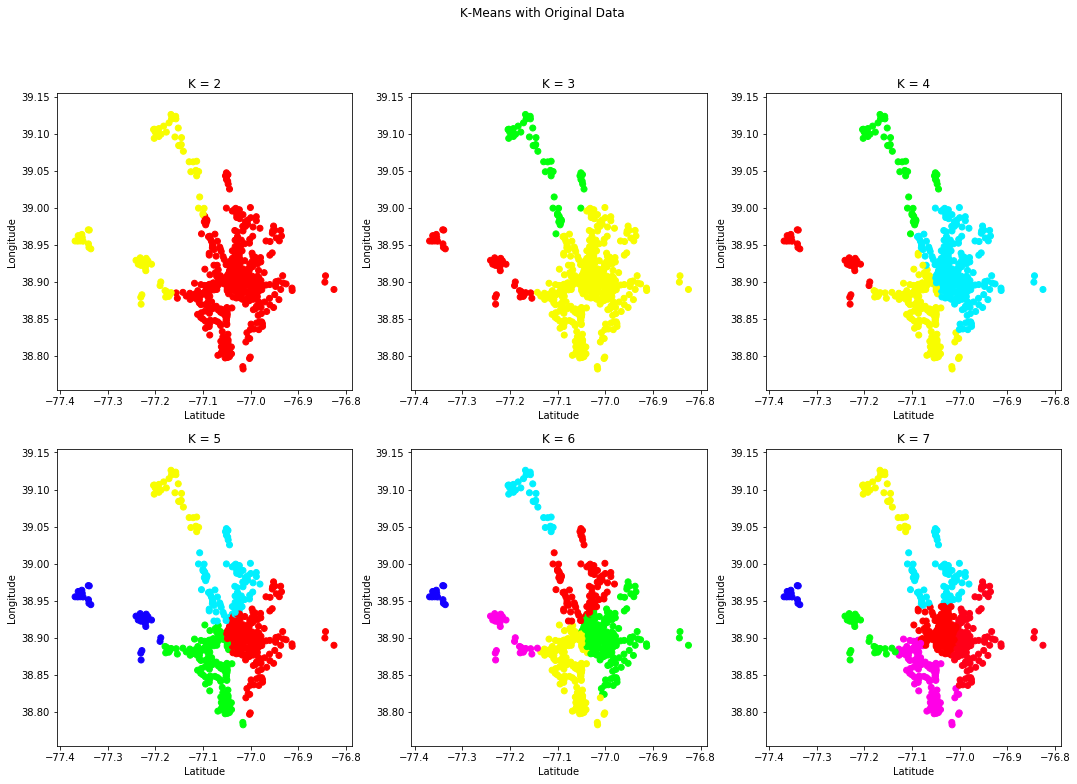

In [16]:
dict_silhouette = {"Value of K":[], "Silhouette Score":[], "Calinski-Harabasz Score":[], "Davies-Bouldin Score":[]}
list_labels = []
for i in range(2, 8):
    kmeans, sil_score, ch_score, db_score = apply_kmeans(latlong_df, i)
    list_labels.append(kmeans.labels_)
    dict_silhouette["Value of K"].append(i)
    dict_silhouette["Silhouette Score"].append(sil_score)
    dict_silhouette["Calinski-Harabasz Score"].append(ch_score)
    dict_silhouette["Davies-Bouldin Score"].append(db_score)
sil_df = pd.DataFrame(dict_silhouette)

visualize_clusters_kmeans(list_labels, main_title="K-Means with Original Data")

In [17]:
sil_df

,Value of K,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
0,2,0.60079,534.19310,0.83081
1,3,0.57862,474.71285,0.69936
2,4,0.40225,523.48646,0.84986
3,5,0.40205,549.73705,0.77628
4,6,0.41207,566.63085,0.69503
5,7,0.40571,634.49061,0.70254


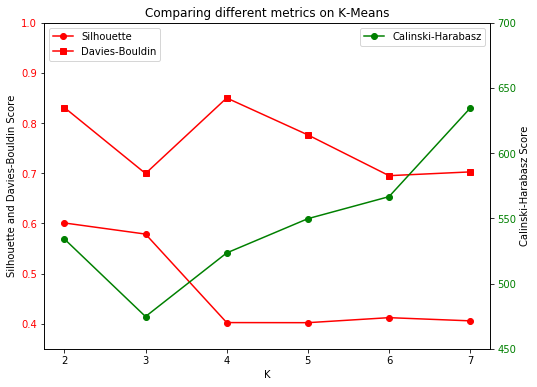

In [18]:
k=sil_df['Value of K'].values
sil=sil_df['Silhouette Score'].values
ch=sil_df['Calinski-Harabasz Score'].values
db=sil_df['Davies-Bouldin Score'].values

fig, ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette and Davies-Bouldin Score')
ln1 = ax1.plot(k, sil, color='red', marker='o', label='Silhouette')
ln2 = ax1.plot(k, db, color='red', marker='s', label='Davies-Bouldin')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_ylim(0.35, 1)
ax1.legend(loc="upper left")

ax2 = ax1.twinx() 
ax2.set_ylabel('Calinski-Harabasz Score')  
ln3 = ax2.plot(k, ch, color='green', marker='o', label='Calinski-Harabasz')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(450, 700)
ax2.legend(loc="upper right")

plt.title("Comparing different metrics on K-Means")

plt.show()


Os clusters gerados pelo KMeans para um número maior de k tende a dividir partes da zona central deixando as extremidades pouco alteradas e como tal não fica claro como definir os clusters.

Apesar dos valores de *Calinski-Harabasz* serem relativamente elevados, em termos práticos as fronteiras não são bem definidas sendo que o modelo iria ser bastante sensível e interpretar valores diferentes para localizações que se encontram próximas.

##### DBSCAN

In [19]:
list_labels=list()
parameters=list()
dict_silhouette = {"Epsilon":[], "N_min":[], "Silhouette Score":[], "Calinski-Harabasz Score":[], "Davies-Bouldin Score":[]}
for n in [2,4]:
    for eps in np.arange(0.025,0.030,0.002):
            parameters.append((round(eps,4), n))
            print("\neps={} and neighbors={}".format(round(eps,4),n))
            dbscan = DBSCAN(eps=eps, min_samples=n)
            labels = dbscan.fit_predict(latlong_df)
            cls = labels + 1
            list_labels.append(labels)
            dict_silhouette["Epsilon"].append(round(eps,4))
            dict_silhouette["N_min"].append(n)
            dict_silhouette["Silhouette Score"].append(round(silhouette_score(latlong_df, labels), 5))
            dict_silhouette["Calinski-Harabasz Score"].append(round(calinski_harabasz_score(latlong_df, labels), 5))
            dict_silhouette["Davies-Bouldin Score"].append(round(davies_bouldin_score(latlong_df, labels), 5))

            print("Clusters present: {}".format(np.unique(labels)))
            
            if -1 in labels :
                print("Cluster sizes: {}".format(np.bincount(cls)))
            else : 
                print("Cluster sizes: {}".format(np.bincount(labels)))


eps=0.025 and neighbors=2
Clusters present: [0 1 2 3 4 5 6]
Cluster sizes: [501  36   8  14  16   3   3]

eps=0.027 and neighbors=2
Clusters present: [0 1 2 3 4 5]
Cluster sizes: [509  36  14  16   3   3]

eps=0.029 and neighbors=2
Clusters present: [0 1 2 3 4 5]
Cluster sizes: [509  36  14  16   3   3]

eps=0.025 and neighbors=4
Clusters present: [-1  0  1  2  3  4]
Cluster sizes: [  6 501  36   8  14  16]

eps=0.027 and neighbors=4
Clusters present: [-1  0  1  2  3]
Cluster sizes: [  6 509  36  14  16]

eps=0.029 and neighbors=4
Clusters present: [-1  0  1  2  3]
Cluster sizes: [  6 509  36  14  16]


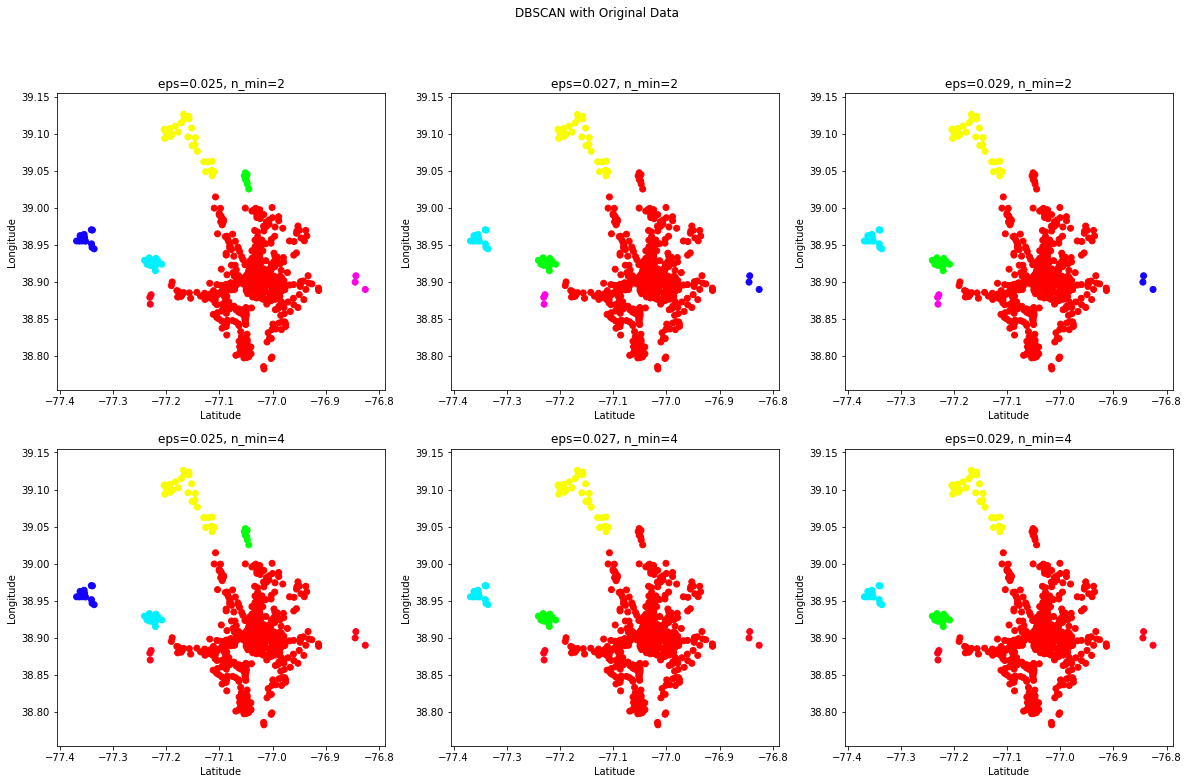

In [20]:
visualize_clusters_dbscan(list_labels, parameters, main_title="DBSCAN with Original Data")

In [21]:
dbscan_res = pd.DataFrame(dict_silhouette)
dbscan_res

,Epsilon,N_min,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
0,0.025,2,0.40054,181.53104,0.34860
1,0.027,2,0.49812,195.48503,0.33508
2,0.029,2,0.49812,195.48503,0.33508
3,0.025,4,0.41610,185.12019,7.68658
4,0.027,4,0.53587,208.55462,7.70710
5,0.029,4,0.53587,208.55462,7.70710


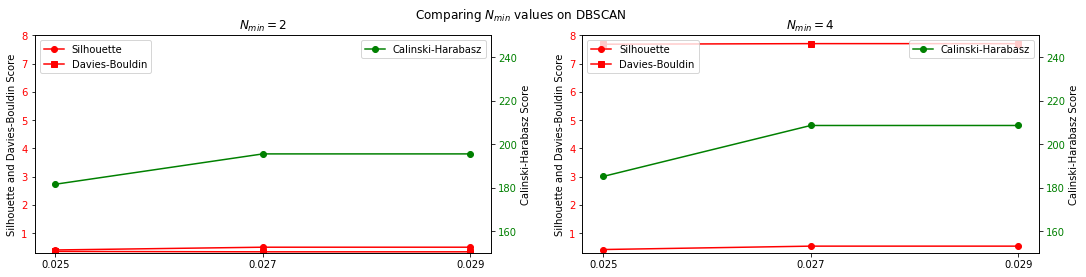

In [22]:
sil=dbscan_res['Silhouette Score'].values
ch=dbscan_res['Calinski-Harabasz Score'].values
db=dbscan_res['Davies-Bouldin Score'].values

def two_scales(ax1, inp, data1, data2, data3):
    ax2 = ax1.twinx()

    xs = [i[0] for i in inp]

    ax1.set_ylabel('Silhouette and Davies-Bouldin Score')
    ax1.plot(xs, data1, color='red', marker='o', label='Silhouette')
    ax1.plot(xs, data2, color='red', marker='s', label='Davies-Bouldin')
    ax1.tick_params(axis='y', labelcolor='red')
    ax1.set_ylim(0.3, 8)
    ax1.legend(loc="upper left")
    ax1.set_xticks(xs)

    ax2.set_ylabel('Calinski-Harabasz Score')  
    ax2.plot(xs, data3, color='green', marker='o', label='Calinski-Harabasz')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.set_ylim(150, 250)
    ax2.legend(loc="upper right")

    return ax1, ax2

# Create axes
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,4))
fig.suptitle("Comparing $N_{min}$ values on DBSCAN")

ax1, ax1a = two_scales(ax1, parameters[0:3], sil[0:3], db[0:3], ch[0:3])
ax1.set_title("$N_{min} = 2$")
ax2, ax2a = two_scales(ax2, parameters[3:6], sil[3:6], db[3:6], ch[3:6])
ax2.set_title("$N_{min} = 4$")
plt.show()

Os clusters gerados pelo DBSCAN parecem ser muito mais naturais que os produzidos pelo KMeans. 
Dependendo do número de clusters produzidos conseguem-se distinguir facilmente diferentes zonas, desde logo se destaca a zona vermelha a zona central da cidade de Washington.
Também é possível distinguir a amarela uma região a norte a cidade de Rockville.
A Oeste existem também 2 zonas distintas, a zona de Reston (mais à esquerda) e a zona de Tysons Corner.
Existem outros pequenos grupos que aparecem (que podem ser ou não tido em conta) Merrifield, Largo e Wheaton.

Observando diretamente os resultados do DBSCAN, também é possível identificar determinadas combinações dos hiperparâmetros que não definem ruído, sendo que essas combinações oferecem um agrupamento de localizações mais próximo da realidade.

Analisando as métricas *Silhouette*, *Calinski-Harabasz* e *Davies-Bouldin*, é possível verificar que à medida que $\epsilon$ aumenta, os valores obtidos têm maior qualidade. No entanto, o aumento de $N_{min}$ já caracteriza localizações que não aparentam ter qualquer relação geográfica. Sendo assim, a melhor caracterização dos *clusters* obtém-se com $(\epsilon, \ N_{min}) = (0.027, \ 2)$.

#### Affinity Propagation

O método Affinity Propagation (ref) tem como objetivo identificar afinidade entre os pontos.
Quanto maior a afinidade de um ponto em relação aos restantes, maior a probabilidade de ser um centróide de um *cluster*.

In [23]:
clustering = AffinityPropagation().fit(latlong_df)
clustering

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

In [24]:
print("Silhouette Score:\t\t", round(silhouette_score(latlong_df, clustering.labels_), 5))
print("Calinski-Harabasz Score:\t", round(calinski_harabasz_score(latlong_df, clustering.labels_), 5))
print("Davies-Bouldin Index:\t\t", round(davies_bouldin_score(latlong_df, clustering.labels_), 5))

Silhouette Score:		 0.45066
Calinski-Harabasz Score:	 1169.76684
Davies-Bouldin Index:		 0.63641


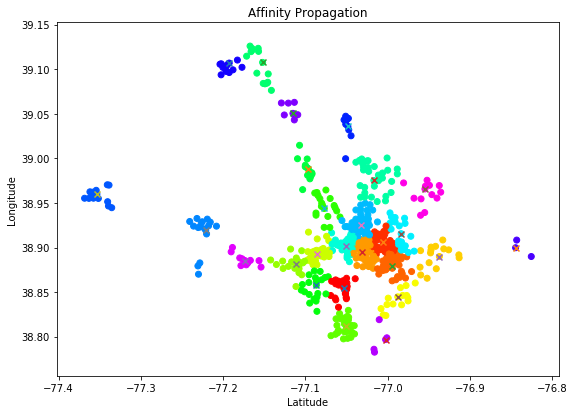

In [25]:
fig = plt.figure(figsize=(9,6.5))
colors = plt.cm.hsv(np.linspace(0, 1, 30))
color_assigs=list(colors[clustering.labels_])
plt.scatter(latlong_df["Longitude"],latlong_df["Latitude"], c=color_assigs)
for i,j in clustering.cluster_centers_:
    plt.scatter(j,i, marker='x')
plt.title("Affinity Propagation")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

### Implementação das *labels* de clustering e observação dos dados

Nesta secção, dadas as labels de *clustering* obtidas através daquele que consideramos o melhor modelo, 
vamos analisar a distribuição do número de alugueres e perceber qual o impacto que a mesma poderá ter nos resultados,
procurando entender se o agrupamento das *docks* somente pelas dimensões da localização é informativo.

Através da observação dos resultados da secção anterior, vamos fazer a análise dos dados a partir dos *clusters* criados através do $\textbf{DBSCAN}$, com parâmetros
$(\epsilon = 0.027, N_{min} = 2)$.

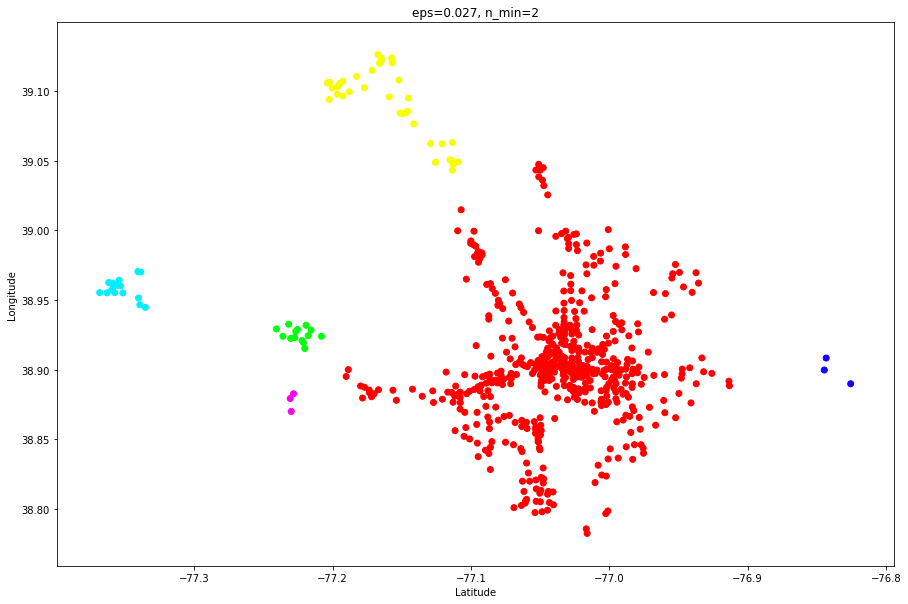

In [26]:
loc_ids = loc_df["StationID"].values
loc_ids = loc_ids.astype('int64')

#Applying DBSCAN on the dataset
dbscan = DBSCAN(eps=0.027, min_samples=2)
cl_labels = dbscan.fit_predict(latlong_df)

colors = plt.cm.hsv(np.linspace(0, 5, 30))

plt.figure(figsize=(15,10))
color_assigs=list(colors[cl_labels])
scatter=plt.scatter(latlong_df["Longitude"],latlong_df["Latitude"], c=color_assigs)
plt.title("eps=0.027, n_min=2")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

map_clusters = dict(zip(loc_ids, cl_labels))

In [27]:
train_df["Start Cluster Label"] = train_df["Start station number"].map(map_clusters)
train_df["End Cluster Label"] = train_df["End station number"].map(map_clusters)

train_df[train_df["Start Cluster Label"]!=train_df["End Cluster Label"]]

,Duration,Start date,Start hour,Workday,End date,End hour,Start station number,Start station,End station number,End station,...,End St. Latitude,End St. Longitude,End Capacity,Maximum Temperature (C),Minimum Temperature (C),Average Temperature (C),Precipitation (mm/day),Wind Speed (m/s),Start Cluster Label,End Cluster Label
1390,3584,2020-01-01,12:45:22,0,2020-01-01,13:45:07,32220,Sunset Hills Rd & Isaac Newton Square,31904,East Falls Church Metro / Sycamore St & 19th St N,...,38.885321,-77.156427,19.0,8.47,-1.17,2.61,0.00,3.49,3,0
21120,1249,2020-01-05,12:32:49,0,2020-01-05,12:53:39,32078,Woodglen Dr & Executive Blvd,32039,Old Georgetown Rd & Southwick St,...,38.999634,-77.109647,19.0,5.65,-0.99,2.70,0.06,4.94,1,0
21393,1551,2020-01-05,13:12:33,0,2020-01-05,13:38:25,32027,Battery Ln & Trolley Trail,32078,Woodglen Dr & Executive Blvd,...,39.043170,-77.113500,16.0,5.65,-0.99,2.70,0.06,4.94,0,1
34168,1327,2020-01-07,12:54:11,1,2020-01-07,13:16:18,32078,Woodglen Dr & Executive Blvd,32039,Old Georgetown Rd & Southwick St,...,38.999634,-77.109647,19.0,4.10,-3.28,0.23,8.13,2.69,1,0
47957,1816,2020-01-09,19:07:43,1,2020-01-09,19:38:00,32027,Battery Ln & Trolley Trail,32077,Rockville Pike & Old Georgetown Rd,...,39.049765,-77.113680,15.0,3.22,-5.02,-1.39,0.00,2.70,0,1
51547,1201,2020-01-10,12:03:37,1,2020-01-10,12:23:39,32039,Old Georgetown Rd & Southwick St,32078,Woodglen Dr & Executive Blvd,...,39.043170,-77.113500,16.0,9.40,-0.84,4.26,0.01,3.14,0,1
52610,1703,2020-01-10,15:18:44,1,2020-01-10,15:47:08,32078,Woodglen Dr & Executive Blvd,32027,Battery Ln & Trolley Trail,...,38.992375,-77.100104,15.0,9.40,-0.84,4.26,0.01,3.14,1,0
57937,1481,2020-01-11,11:37:16,0,2020-01-11,12:01:57,32078,Woodglen Dr & Executive Blvd,32039,Old Georgetown Rd & Southwick St,...,38.999634,-77.109647,19.0,18.94,7.84,14.04,0.66,5.88,1,0
58084,4130,2020-01-11,11:49:58,0,2020-01-11,12:58:48,31049,Utah St & 11th St N,32203,Tysons One Pl & Chain Bridge Rd,...,38.919475,-77.221179,11.0,18.94,7.84,14.04,0.66,5.88,0,2
59376,3212,2020-01-11,13:34:12,0,2020-01-11,14:27:45,32235,Merrifield Cinema & Merrifield Town Center,31034,Fairfax Dr & N Randolph St,...,38.882629,-77.109366,11.0,18.94,7.84,14.04,0.66,5.88,5,0


Desde já é notório um número muito reduzido de viagens entre *clusters* algo que nos indicia uma boa divisão dos mesmos.

Numa primeira análise, vamos criar um novo dataframe agrupando os dados por *cluster*, dia e hora e contando o número de alugueres para cada uma dessas combinações.

Dado que temos **6 clusters**, **31 dias** e **24 horas** por dia, é esperado que se obtenham $6 \times 31 \times 24 = 4464$ combinações possíveis.

In [28]:
train_df['Hour']=pd.to_datetime(train_df['Start hour']).dt.hour
train_df['Day']=pd.to_datetime(train_df['Start date']).dt.day

rental_stats_df=train_df.groupby(['Start Cluster Label','Day','Hour']).agg({'Workday':'mean','Average Temperature (C)':'mean',
                                         'Precipitation (mm/day)':'mean','Wind Speed (m/s)':'mean','Member type':'count'}).reset_index()
rental_stats_df.rename(columns={'Member type':'Number of rentals'},inplace=True)

In [29]:
rental_stats_df

,Start Cluster Label,Day,Hour,Workday,Average Temperature (C),Precipitation (mm/day),Wind Speed (m/s),Number of rentals
0,0,1,0,0,2.61,0.00,3.49,105
1,0,1,1,0,2.61,0.00,3.49,117
2,0,1,2,0,2.61,0.00,3.49,101
3,0,1,3,0,2.61,0.00,3.49,37
4,0,1,4,0,2.61,0.00,3.49,14
...,...,...,...,...,...,...,...,...
1465,5,30,7,1,-0.78,0.00,2.33,1
1466,5,30,14,1,-0.78,0.00,2.33,1
1467,5,30,21,1,-0.78,0.00,2.33,1
1468,5,30,22,1,-0.78,0.00,2.33,1


Das 4464 combinações possíveis, apenas 1470 apresentam valores que indicam aluguer de bicicletas, então vamos preencher todas as restantes com valores nulos.

Referir que $\frac{1470}{4464} \approx \frac{1}{3} $. Dois terços das combinações não contêm qualquer registo, o que pode levar ao enviesamento dos resultados. 

In [30]:
for d in np.unique(rental_stats_df.Day):
    for c in np.unique(rental_stats_df['Start Cluster Label']):
        hours=rental_stats_df[(rental_stats_df['Day']==d)&(rental_stats_df['Start Cluster Label']==c)]['Hour']
        if len(hours)!=24:
            md=set(range(24))-set(hours)
            w,t,p,ws=rental_stats_df[(rental_stats_df['Day']==d)&(rental_stats_df['Hour']==8)][rental_stats_df.columns[3:7]].values[0]
            new=[pd.Series([c,d,h,w,t,p,ws,0],index=rental_stats_df.columns) for h in md]
            rental_stats_df=rental_stats_df.append(new, ignore_index=True)
        
rental_stats_df.sort_values(by=['Start Cluster Label','Day','Hour'],inplace=True) 

In [31]:
rental_stats_df

,Start Cluster Label,Day,Hour,Workday,Average Temperature (C),Precipitation (mm/day),Wind Speed (m/s),Number of rentals
0,0.0,1.0,0.0,0.0,2.61,0.00,3.49,105.0
1,0.0,1.0,1.0,0.0,2.61,0.00,3.49,117.0
2,0.0,1.0,2.0,0.0,2.61,0.00,3.49,101.0
3,0.0,1.0,3.0,0.0,2.61,0.00,3.49,37.0
4,0.0,1.0,4.0,0.0,2.61,0.00,3.49,14.0
...,...,...,...,...,...,...,...,...
4459,5.0,31.0,19.0,1.0,1.37,0.26,1.40,0.0
4460,5.0,31.0,20.0,1.0,1.37,0.26,1.40,0.0
4461,5.0,31.0,21.0,1.0,1.37,0.26,1.40,0.0
4462,5.0,31.0,22.0,1.0,1.37,0.26,1.40,0.0


#### Distribuição de alugueres pelos *clusters* e observação dos dados

O senso comum indicará que quanto maior o número de *docks*, maior o número de alugueres. 

Observando a distribuição é possível ver que a distribuição é bastante nivelada, sendo que grande parte das *docks* se concentra no cluster 0 - o cluster central.

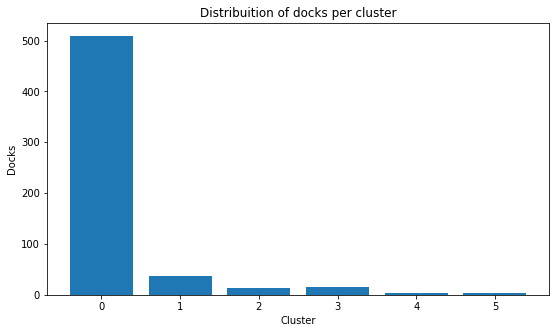

In [32]:
from collections import Counter

D = dict(Counter(cl_labels))

plt.figure(figsize=(9,5))
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("Distribuition of docks per cluster")
plt.xlabel("Cluster")
plt.ylabel("Docks")

plt.show()

Como esperado, a distribuição de alugueres ao longo do mês é também ela bastante desnivelada, sendo até ao nível dos milhares. 
O cluster 0 é dominador deixando os restantes sem qualquer expressão.

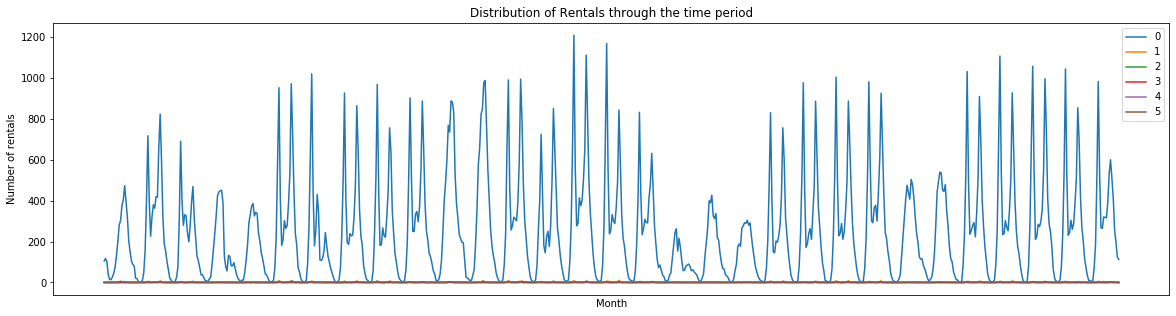

In [33]:
plt.figure(figsize=(20,5))
plt.title("Distribution of Rentals through the time period")
plt.xticks([])
plt.xlabel("Month")
plt.ylabel("Number of rentals")
for c in np.unique(rental_stats_df['Start Cluster Label']):     
    plt.plot(range(len(rental_stats_df[rental_stats_df['Start Cluster Label']==c])),rental_stats_df[rental_stats_df['Start Cluster Label']==c]['Number of rentals'],label=int(c))
    plt.legend()

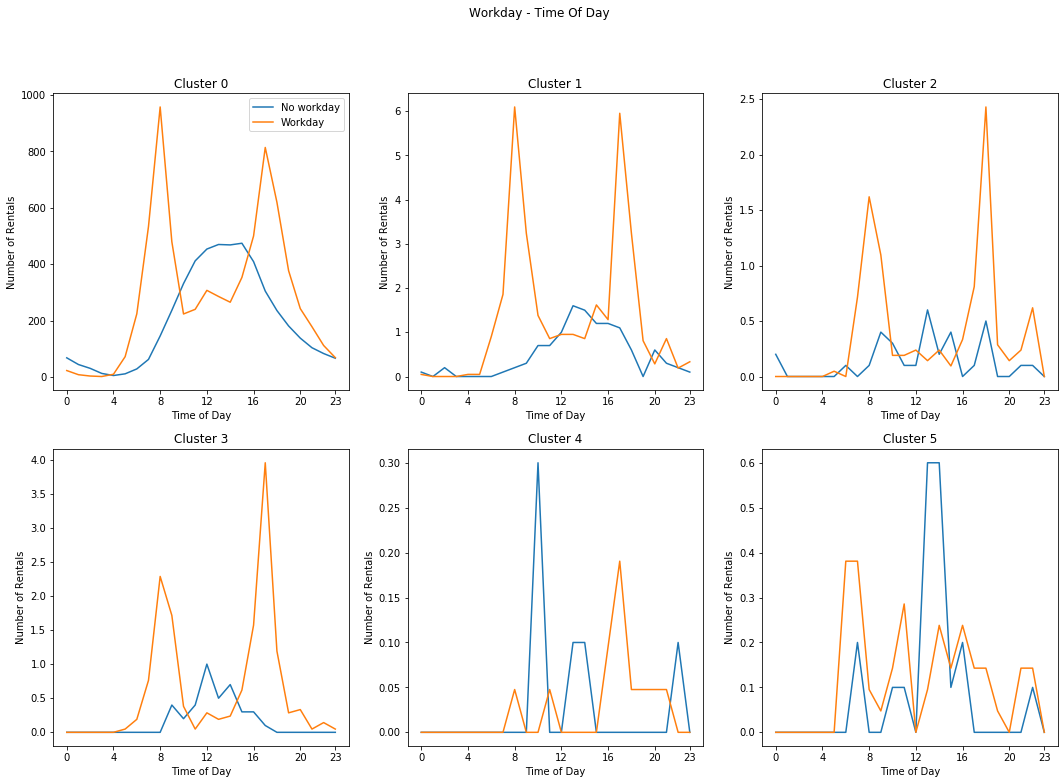

In [34]:
fig, axs = plt.subplots(2,3, figsize=(18,12))
fig.suptitle("Workday - Time Of Day")
wk={1:'Workday',0:'No workday'}

for c, ax in enumerate(fig.axes):
    for i in [0,1]:
        date_time=rental_stats_df[(rental_stats_df['Start Cluster Label']==c) & (rental_stats_df['Workday']==i)].groupby(['Hour']).mean().reset_index()
        ax.plot(date_time.Hour,date_time['Number of rentals'], label=wk[i])
    title='Cluster '+str(c)
    ax.set_title(title)
    ax.set_xticks([0,4,8,12,16,20,23])
    ax.set_xlabel("Time of Day")
    ax.set_ylabel("Number of Rentals")
    if c == 0 : ax.legend(loc=0)
plt.show()


Mais uma vez é possível ver através do eixo do y que o número médio de bicicletas alugadas é muito baixo à exceção daquelas no cluster 0.

Para conseguir-se previsões mais adequadas e precisas iremos agrupar todos os clusters e fazer previsões de forma global.

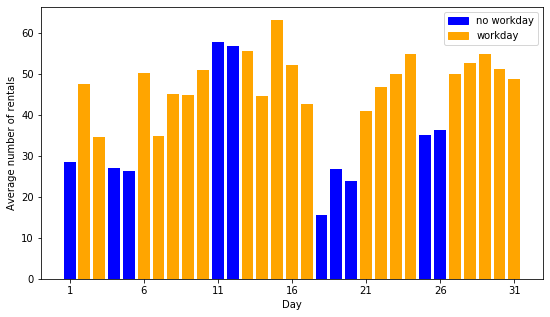

In [35]:
dfh=rental_stats_df.groupby(['Day']).mean().reset_index()

plt.figure(figsize=(9,5))

c=['orange']*len(dfh)
l=['Workday']*len(dfh)
for i,j in enumerate(dfh['Workday']):
    if j==0:
        c[i]='blue'
        l[i]='No workday'

colors = {'no workday':'blue', 'workday':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

plt.legend(handles, labels)

plt.bar(dfh['Day'],dfh['Number of rentals'], align='center', color=c)
plt.xticks([1,6,11,16,21,26,31])
plt.xlabel('Day')
plt.ylabel('Average number of rentals')

plt.show()

Ser ou não dia util influencia no número de alugueres, havendo no geral um número menor nos dias não úteis.

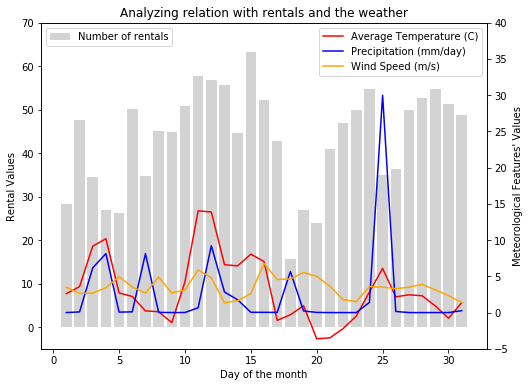

In [36]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel('Day of the month')
ax1.set_ylabel('Rental Values')
plt.bar(dfh['Day'],dfh['Number of rentals'], color='lightgray', label='Number of rentals')
ax1.tick_params(axis='y')
ax1.set_ylim(-5, 70)
ax1.legend(loc="upper left")

ax2 = ax1.twinx() 
ax2.set_ylabel("Meteorological Features' Values")  
plt.plot(dfh['Day'],dfh['Average Temperature (C)'], color='r', label='Average Temperature (C)')
plt.plot(dfh['Day'],dfh['Precipitation (mm/day)'], color='b', label='Precipitation (mm/day)')
plt.plot(dfh['Day'],dfh['Wind Speed (m/s)'], color='orange', label='Wind Speed (m/s)')
ax2.tick_params(axis='y')
ax2.set_ylim(-5, 40)
ax2.legend(loc="upper right")

plt.title("Analyzing relation with rentals and the weather")

plt.show()

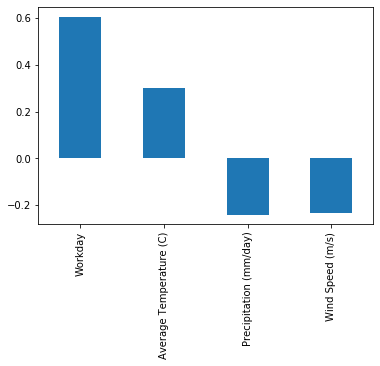

In [37]:
res = dfh[['Workday','Average Temperature (C)', 'Precipitation (mm/day)', 'Wind Speed (m/s)', 'Number of rentals']].drop("Number of rentals", axis=1).apply(lambda x: x.corr(dfh['Number of rentals'])).dropna()
ax = res.plot.bar()

--------------------

## Previsão do número de bicicletas agrupadas

Dadas as observações feitas na secção anterior, vamos trabalhar com o *dataset* como um todo, descartando a informação oferecida pelos *clusters*.

Para o recurso aos modelos, vamos definir os conjuntos:
* Conjunto-treino (*train*): observações dos primeiros 21 dias do mês;
* Conjunto-teste (*test*): observações dos restantes dias, descartando o número de alugueres.

Tipos de previsão a efetuar:
* Uma hora
* Um dia
* Dez dias
* Observação apenas com dados meterológicos

In [38]:
#Regression Models
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score 

#### Conjuntos para *one-hour predictions*

In [39]:
train_df=train_df.groupby(['Day','Hour']).agg({'Workday':'mean','Average Temperature (C)':'mean',
                                            'Precipitation (mm/day)':'mean','Wind Speed (m/s)':'mean','Member type':'count'}).reset_index()
train_df.rename(columns={'Member type':'Number of rentals'},inplace=True)
train_df

,Day,Hour,Workday,Average Temperature (C),Precipitation (mm/day),Wind Speed (m/s),Number of rentals
0,1,0,0,2.61,0.00,3.49,105
1,1,1,0,2.61,0.00,3.49,117
2,1,2,0,2.61,0.00,3.49,101
3,1,3,0,2.61,0.00,3.49,37
4,1,4,0,2.61,0.00,3.49,14
...,...,...,...,...,...,...,...
734,31,19,1,1.37,0.26,1.40,413
735,31,20,1,1.37,0.26,1.40,256
736,31,21,1,1.37,0.26,1.40,198
737,31,22,1,1.37,0.26,1.40,125


In [40]:
data={}

df_1h=train_df.copy()
df_1h['NextHourRentals']=df_1h['Number of rentals'].shift(-1)
df_1h.dropna(inplace=True)

x_train=df_1h[df_1h['Day']<22][df_1h.columns[1:-2]]
y_train=df_1h[df_1h['Day']<22][df_1h.columns[-1]]

x_test=df_1h[df_1h['Day']>21][df_1h.columns[1:-2]]
y_test=df_1h[df_1h['Day']>21][df_1h.columns[-1]]


data['1hour']=[x_train,y_train,x_test,y_test]

#### Conjuntos para *one-day predictions*

In [41]:
df_24=train_df.copy()
df_24['TomorrowRentals']=df_24['Number of rentals'].shift(-24)
df_24.dropna(inplace=True)

x_train=df_24[df_24['Day']<22][df_24.columns[1:-2]]
y_train=df_24[df_24['Day']<22][df_24.columns[-1]]

x_test=df_24[df_24['Day']>21][df_24.columns[1:-2]]
y_test=df_24[df_24['Day']>21][df_24.columns[-1]]

data['1day']=[x_train,y_train,x_test,y_test]

#### Conjuntos para *ten-days predictions*

In [55]:
df_10=train_df.copy()
df_10['10daysRentals']=df_10['Number of rentals'].shift(-24*10)
df_10.dropna(inplace=True)

x_train=df_10[df_10['Day']<22][df_10.columns[1:-1]]
y_train=df_10[df_10['Day']<22][df_10.columns[-1]]

x_test=df_10[df_10['Day']>11][df_10.columns[1:-1]]
y_test=df_10[df_10['Day']>11][df_10.columns[-1]]

data['10days']=[x_train,y_train,x_test,y_test]

#### Conjuntos para *weather-information predictions*

In [49]:
df_pr=train_df.copy()
x_train=df_pr[df_pr['Day']<22][df_pr.columns[1:-1]]
y_train=df_pr[df_pr['Day']<22][df_pr.columns[-1]]

x_test=df_pr[df_pr['Day']>21][df_pr.columns[1:-1]]
y_test=df_pr[df_pr['Day']>21][df_pr.columns[-1]]

data['FutureData']=[x_train,y_train,x_test,y_test]

#### Comparação de métricas

In [44]:
models=[RandomForestRegressor(),
        AdaBoostRegressor(),
        BaggingRegressor(),
        GradientBoostingRegressor(),
        SVR(kernel='poly'),
        KNeighborsRegressor(n_neighbors=6)]

model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','GradientBoostingRegressor',
             'SVR','KNeighborsRegressor']
rmse_df=pd.DataFrame(model_names,columns=['Modelling Algo'])
r2_df=rmse_df.copy()

for t,v in data.items():
    rmse=[]
    r2=[]
    for model in range (len(models)):
        clf=models[model]
        clf.fit(v[0],v[1])
        test_pred=clf.predict(v[2])
        rmse.append(np.sqrt(mean_squared_error(test_pred,v[3])))
        r2.append(r2_score(test_pred,v[3]))
    rmse_df[t+'-RMSE']=rmse
    r2_df[t+'-R^2']=r2   
rmse_df

,Modelling Algo,1hour-RMSE,1day-RMSE,10days-RMSE,FutureData-RMSE
0,RandomForestRegressor,66.084872,139.844395,48.688895,66.171813
1,AdaBoostRegressor,146.906237,175.124596,169.463298,128.680107
2,BaggingRegressor,67.133524,137.215440,69.292524,70.158216
3,GradientBoostingRegressor,85.789033,136.377977,101.903747,84.915086
4,SVR,284.159694,279.737718,267.339787,292.245008
5,KNeighborsRegressor,146.464897,165.865272,195.998592,145.710580


In [45]:
r2_df

,Modelling Algo,1hour-R^2,1day-R^2,10days-R^2,FutureData-R^2
0,RandomForestRegressor,0.916498,0.560677,0.957072,0.916565
1,AdaBoostRegressor,0.450399,0.191113,0.342948,0.592622
2,BaggingRegressor,0.924548,0.598743,0.908596,0.908089
3,GradientBoostingRegressor,0.838628,0.570313,0.766438,0.846965
4,SVR,-12.457049,-151.774221,-85.788367,-18.630694
5,KNeighborsRegressor,0.374951,0.109382,-0.428496,0.374640


(0, 1)

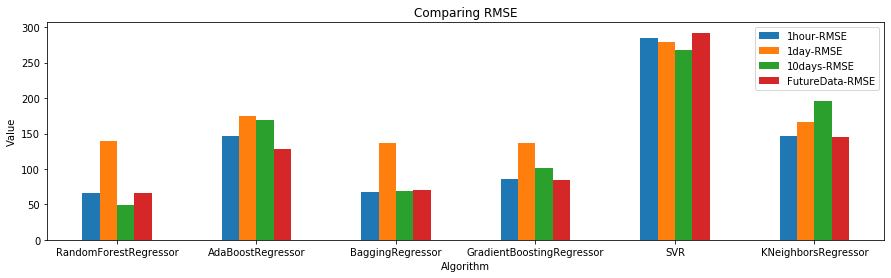

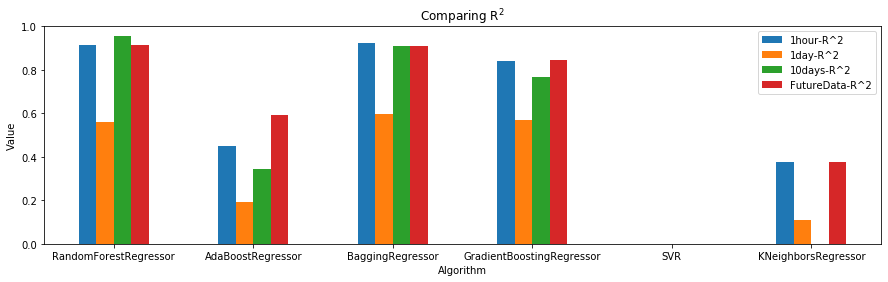

In [46]:
rmse_df_copy = rmse_df.copy()
rmse_df_copy.set_index("Modelling Algo", inplace=True)
ax = rmse_df_copy.plot.bar(rot=0, figsize=(15,4))
ax.set_title("Comparing RMSE")
ax.set_xlabel("Algorithm")
ax.set_ylabel("Value")

r2_df_copy = r2_df.copy()
r2_df_copy.set_index("Modelling Algo", inplace=True)
ax = r2_df_copy.plot.bar(rot=0, figsize=(15,4))
ax.set_title("Comparing R$^2$")
ax.set_xlabel("Algorithm")
ax.set_ylabel("Value")
ax.set_ylim(0,1)

#### Aplicação do *Random Forest Regressor* e observação dos resultados

In [47]:
#for random forest regresion.
def rf (x_train,y_train,x_test,y_test):
    no_of_test=[500]
    params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto"]}
    clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error',cv=5)
    clf_rf.fit(x_train,y_train)
    pred=clf_rf.predict(x_test)
    val=round((np.sqrt(mean_squared_error(pred,y_test))),5)
    return pred, val

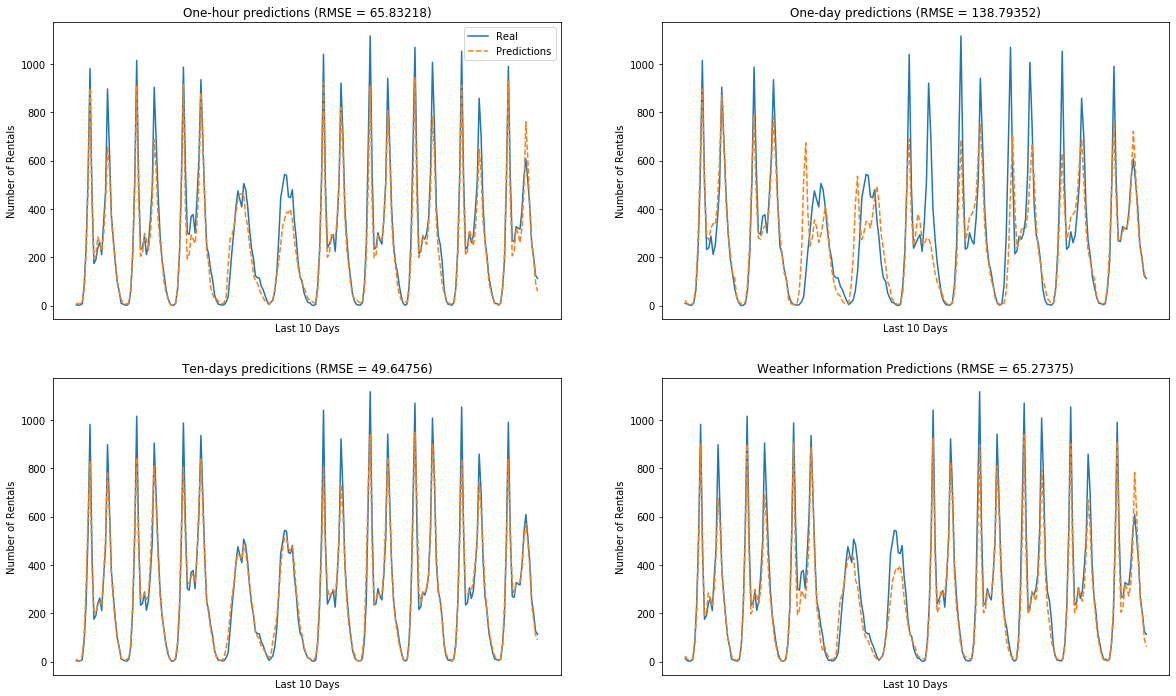

In [48]:
elems = list(data.items())
titles= ["One-hour predictions", "One-day predictions", "Ten-days predicitions", "Weather Information Predictions"]
fig, axs = plt.subplots(2,2, figsize=(20,12))

for i, ax in enumerate(fig.axes):
    pred, val = rf(elems[i][1][0], elems[i][1][1], elems[i][1][2], elems[i][1][3])
    ax.set_xlabel("Last 10 Days")
    ax.set_ylabel("Number of Rentals")
    ax.set_xticks([])
    title = titles[i] + " (RMSE = " + str(val) + ")"
    ax.set_title(title)
    ax.plot(range(len(elems[i][1][-1])),elems[i][1][-1], label='Real')
    ax.plot(range(len(pred)),pred, linestyle='dashed', label="Predictions")
    if i == 0: 
        ax.legend()
plt.show()